In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#randint
print(np.random.randint(46))
print(np.random.randint(5,7))

39
6


In [81]:
print(np.random.rand(6))
print(np.random.rand(6,3,4))

[0.32104893 0.38607948 0.86000907 0.18800327 0.62483126 0.22749119]
[[[0.95072722 0.56347711 0.41222434 0.74045172]
  [0.15784244 0.78137447 0.10214991 0.03314557]
  [0.19120839 0.78711053 0.64091732 0.44181697]]

 [[0.8673401  0.68696168 0.0389872  0.0136756 ]
  [0.1130716  0.35588801 0.87498828 0.2115334 ]
  [0.48471971 0.31452621 0.43508627 0.51175912]]

 [[0.22660495 0.49444645 0.62306126 0.34436335]
  [0.49878199 0.52989532 0.31417674 0.56899882]
  [0.53071089 0.14388122 0.64961865 0.41057343]]

 [[0.31626588 0.8297376  0.88927314 0.12545483]
  [0.72167431 0.3266952  0.0317197  0.55627611]
  [0.58402777 0.61086342 0.04913909 0.82861277]]

 [[0.18535757 0.16244147 0.99513569 0.37473322]
  [0.51596968 0.49363277 0.97597249 0.53945115]
  [0.21970576 0.85070133 0.0269821  0.3655858 ]]

 [[0.41556874 0.89381192 0.29325757 0.41200191]
  [0.01418382 0.7123285  0.3506968  0.44776395]
  [0.68685777 0.22936689 0.52857724 0.0227776 ]]]


In [85]:
print(np.random.randn(3,2)) 

[[ 1.58915816 -0.5351555 ]
 [-0.15127981  0.06868551]
 [-1.59218772 -0.98264528]]


#### y = 4*X+6
- fitable data & noise

In [127]:
np.random.seed(0)
X = 2 * np.random.rand(100,1) # *2 for noise
X[:10]

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304]])

In [128]:
y = 6 + 4 * X + np.random.randn(100,1) # randn for noise label

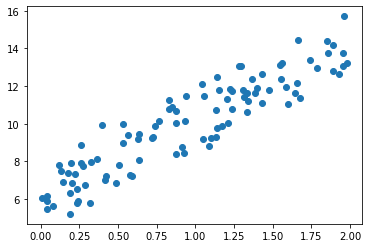

In [129]:
plt.scatter(X,y)

###### W1, W2 update

In [130]:
def get_w_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y) #100
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = w0 + np.dot(X, w1.T)
    
    diff = y - y_pred
    
    w0_fact = np.ones((N,1))
    
    w1_update = -(2/N) * learning_rate * (np.dot(X.T,diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_fact.T,diff))

    return w1_update, w0_update

In [131]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for idx in range(iters):
        w1_upd, w0_upd = \
        get_w_updates(w1,w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_upd
        w0 = w0 - w0_upd
    return w1,w0

In [132]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    
    return cost

In [133]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)

In [134]:
print('w1 : {0:.3f},  w0 : {0:.3f}'.format(w1[0,0],w0[0,0]))

w1 : 4.022,  w0 : 4.022


In [141]:
y_pred = w1[0,0] * X + w0[0,0]

In [142]:
y_pred[:5]

array([[10.5764825 ],
       [11.91474793],
       [11.01043516],
       [10.54486846],
       [ 9.56975253]])

In [143]:
y[:5]

array([[ 9.22535819],
       [12.62234142],
       [11.28776945],
       [ 8.82282178],
       [10.87749059]])

In [144]:
print('전체 오차 : {0:.4f}'.format(get_cost(y, y_pred)))

전체 오차 : 0.9935


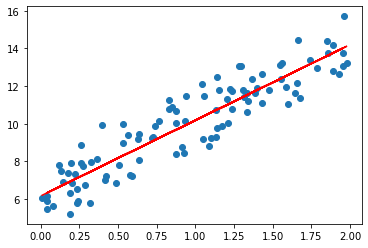

In [147]:
plt.scatter(X,y)
plt.plot(X,y_pred, color = 'r')